In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import signals
import u

# Data Generation

<AxesSubplot:>

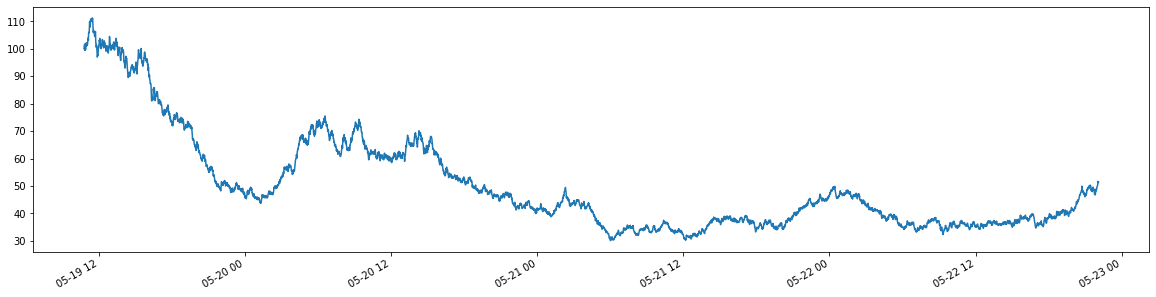

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=5000)
data["close"].plot.line()

# Triple Barrier

In [4]:
resampled = data.resample("H")
target = np.mean((resampled["close"].last() / resampled["close"].first()).std())
price_target = 1
stop_loss = 1
vertical_barrier = np.timedelta64(3, "h")

target

0.07290834180288615

<AxesSubplot:>

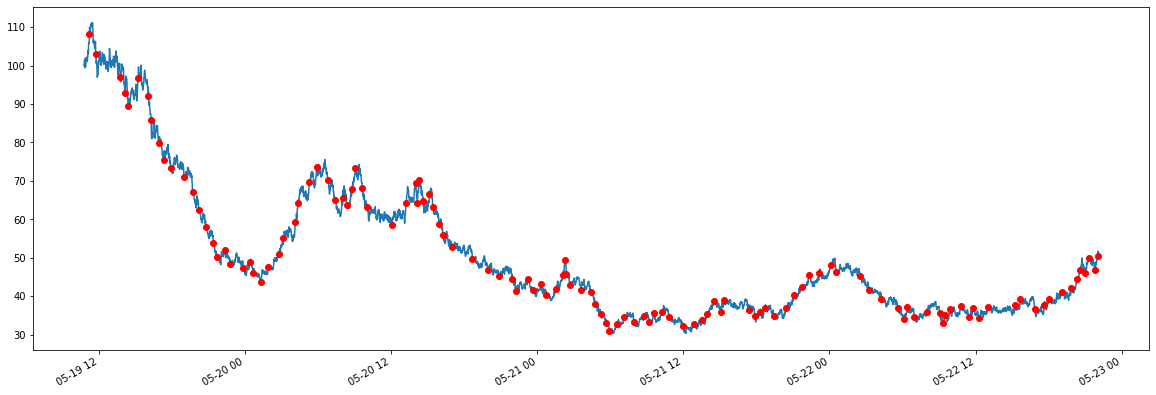

In [5]:
cusum_indices = signals.get_cusum_indices_on_pct_returns(data["close"], target)

plt.rcParams["figure.figsize"] = (20, 7)

data["close"].plot.line()
(data["close"] * cusum_indices).replace(0, np.nan).plot(style="o", color="r")

In [6]:
indices = data.index[cusum_indices]

In [7]:
barriers = signals.get_price_target_stop_loss_indices(
    data,
    indices,
    target=target,
    side=np.random.choice([c.Dir.B, c.Dir.S], len(indices)),
    price_target=price_target,
    stop_loss=stop_loss,
    vertical_barrier=vertical_barrier,
)
barriers = signals.add_profit_target_stop_loss_outcome(barriers)

In [8]:
last = barriers.index[0]
plot_indices = [last]
for i in barriers.index:
    if last + vertical_barrier < i:
        plot_indices.append(i)
        last = i
barriers.loc[plot_indices].head(10)

,pt_dt,sl_dt,side,pt_sl,pt
2022-05-19 11:13:49.174661,NaT,2022-05-19 11:50:49.174661,1,-1,False
2022-05-19 14:24:49.174661,2022-05-19 15:13:49.174661,2022-05-19 16:19:49.174661,1,1,True
2022-05-19 17:53:49.174661,2022-05-19 19:41:49.174661,NaT,-1,1,True
2022-05-19 21:23:49.174661,NaT,2022-05-19 21:48:49.174661,1,-1,False
2022-05-20 00:24:49.174661,2022-05-20 02:56:49.174661,2022-05-20 00:58:49.174661,1,-1,False
2022-05-20 04:08:49.174661,2022-05-20 04:20:49.174661,NaT,1,1,True
2022-05-20 07:21:49.174661,2022-05-20 10:09:49.174661,2022-05-20 08:57:49.174661,-1,-1,False
2022-05-20 12:02:49.174661,2022-05-20 13:12:49.174661,NaT,1,1,True
2022-05-20 15:08:49.174661,2022-05-20 15:32:49.174661,NaT,-1,1,True
2022-05-20 18:40:49.174661,NaT,2022-05-20 20:20:49.174661,1,-1,False


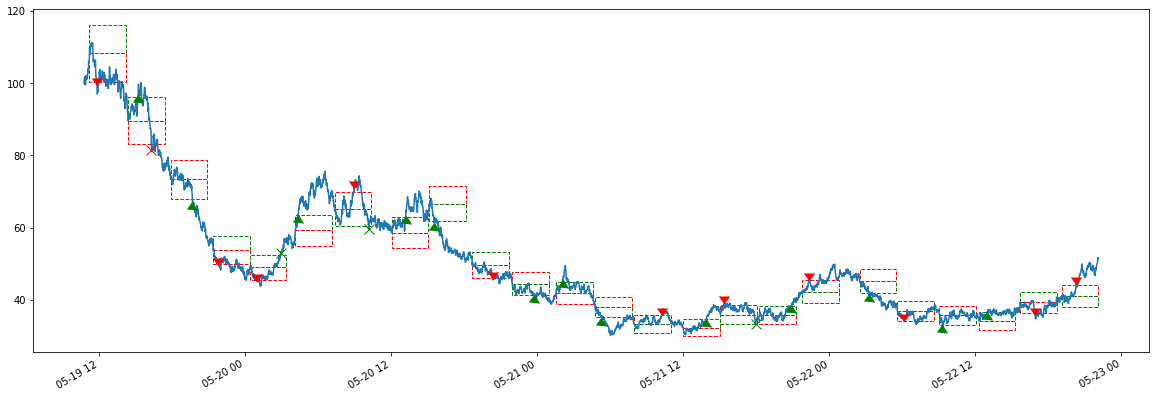

In [9]:
import plt_utils

fig, ax = plt.subplots()
data["close"].plot.line()

plt_utils.plot_triple_barrier(
    ax,
    data,
    barriers.loc[plot_indices],
    target=target,
    price_target=price_target,
    stop_loss=stop_loss,
    vertical_barrier=vertical_barrier,
)